# Digital House - Data Science a Distancia

## Trabajo Práctico 3

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
<p style="text-align:right;">Junio 2022</p>

---
#### Librerías necesarias

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### Style

In [7]:
sns.set()
plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 20
sns.mpl.rcParams['axes.labelsize'] = 18


#### Dataset


Autor: [Islombek Davronov](https://www.kaggle.com/islombekdavronov) - [Credit-scoring data](https://www.kaggle.com/datasets/islombekdavronov/creditscoring-data)

"*The data is collected from the real source and converted to numeric values for better training and classifying the **people who are able or not able to pay** their credits.*"

In [8]:
#Levantando el csv

data = pd.read_csv('../Data/data_train.csv')

---
#### Functions for this notebook

In [9]:
def basic_EDA(data) :
    u'''
    Basic EDA routine for this practice
    '''
    
    print()
    print("Observaciones", data.shape[0], "Características", data.shape[1])
    display(data.head(5))
    
    print()
    print("Descripción de las características")
    display(data.describe())
    
    print()
    print("Valores nulos")
    display(data.isnull().sum())
    
    print()
    print("Tipos de datos")
    display(data.dtypes)
    
    # La característica INPS_mln_sum tiene valores enteros, se convierte a ese tipo
    data['INPS_mln_sum'] = data['INPS_mln_sum'].astype(int)
    
    # La característica Score_point es del tipo objet y presenta valores no numéricos
    # al no contar con información sobre su significado se elimina del dataset
    data.drop('Score_point', axis=1, inplace=True)

    # to have more legibility
    data['label_means'] = data['label'].map({0 : 'insolvency', 1 : 'pay credit'})    
    
    return data


In [10]:
def show_some_plots(data, columns, target=None, cols=4) :
    u'''
    Display some countplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to count
        target : binary values to split the count; if is None draw a simple countplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    if target != None :
        rows *= 2
    for i, column in enumerate(data[columns]) :
        if target == None :
            plt.subplot(rows, cols, i+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
        else :
            # standar count plot
            plt.subplot(rows, cols, i*2+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
            
            # count by target values
            plt.subplot(rows, cols, i*2+2)
            sns.countplot(data=data, x=column, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
    return

In [11]:
def show_some_hists(data, columns, target=None, cols=4) :
    u'''
    Display some histograms graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show 
        target : binary values to split the count; if is None draw a simple histplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    for i, column in enumerate(data[columns]) :
        plt.subplot(rows, cols, i+1)
        sns.histplot(data=data, x=column, kde=True, hue=target)
        plt.tight_layout();
        plt.xlabel(column);
        plt.ylabel(None);
    return

In [12]:
def show_some_boxplots(data, columns, target=None, cols=4) :
    u'''
    Display some boxplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show
        target : binary values to split the histogram; if is None draw a simple histplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    for i, column in enumerate(data[columns]) :
        plt.subplot(rows, cols, i+1)
        sns.boxplot(data=data, x=target, y=column, palette="RdYlBu")
        plt.tight_layout();
        plt.xlabel(None);
        plt.ylabel(column);
    return

In [13]:
def basic_plots(data) :
    u'''
    Shows counts plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,40));
    fig.suptitle('\nCaracteríscias y su relación con el objetivo\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['label', 'label_means'], axis=1).columns)
    show_some_plots(data=data, columns=columns, target='label_means')
    
    return

In [14]:
def basic_hists(data) :
    u'''
    Shows histogrms for this practice
    '''
    
    fig = plt.figure(figsize=(25,25));
    fig.suptitle('\nHistogramas\n', verticalalignment='center', 
                 fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['label', 'label_means'], axis=1).columns)
    show_some_hists(data=data, columns=columns, target='label_means')

    return

In [15]:
def basic_boxplots(data) :
    u'''
    Shows bosx plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,25));
    fig.suptitle('\nVariación de algunas características según el objetivo (insolvente si o no)\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    columns=['Age', 'Marital', 'Field', 'Month_of_birth', 'Region', 
             'Number_of_credits', 'Linked_cards', 'Score_level', 'Score_class', 'Changed_phone_number']
    show_some_boxplots(data=data, columns=columns, target='label_means', cols=5)

    return

---
#### Exploratory Data Analysis

In [16]:
data = basic_EDA(data)


Observaciones 8707 Características 18


,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0.0,0,0,0,-,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0.0,0,0,0,-,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1.0,1,0,0,-,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1.0,0,0,0,-,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2.0,1,0,0,-,1



Descripción de las características


,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Changed_phone_number
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,0.923050,37.690479,1.147468,1.622488,4.540829,1.032043,10.485012,6.360859,1.462157,11.207190,1.119789,1.100838,2.132932,0.957505,0.547491,1.082807,0.112094
std,0.266527,10.750031,0.354592,0.484792,1.053161,0.176125,5.597442,3.405988,0.498594,3.020191,0.366915,0.315294,2.225331,0.201726,1.190702,2.447644,0.344394
min,0.000000,19.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.000000,1.000000,1.000000,4.000000,1.000000,6.000000,3.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,1.000000,2.000000,4.000000,1.000000,13.000000,6.000000,1.000000,12.000000,1.000000,1.000000,1.700000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,44.000000,1.000000,2.000000,5.000000,1.000000,14.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.800000,1.000000,0.000000,0.000000,0.000000
max,1.000000,79.000000,2.000000,2.000000,7.000000,2.000000,22.000000,12.000000,2.000000,14.000000,5.000000,4.000000,86.300000,1.000000,4.000000,11.000000,3.000000



Valores nulos


label                   0
Age                     0
Language                0
Sex                     0
Marital                 0
Has_Credit              0
Field                   0
Month_of_birth          0
Day_of_birth            0
Region                  0
Number_of_credits       0
Linked_cards            0
INPS_mln_sum            0
INPS_yes_no             0
Score_level             0
Score_class             0
Score_point             0
Changed_phone_number    0
dtype: int64


Tipos de datos


label                     int64
Age                       int64
Language                  int64
Sex                       int64
Marital                   int64
Has_Credit                int64
Field                     int64
Month_of_birth            int64
Day_of_birth              int64
Region                    int64
Number_of_credits         int64
Linked_cards              int64
INPS_mln_sum            float64
INPS_yes_no               int64
Score_level               int64
Score_class               int64
Score_point              object
Changed_phone_number      int64
dtype: object

---
#### Some graphs

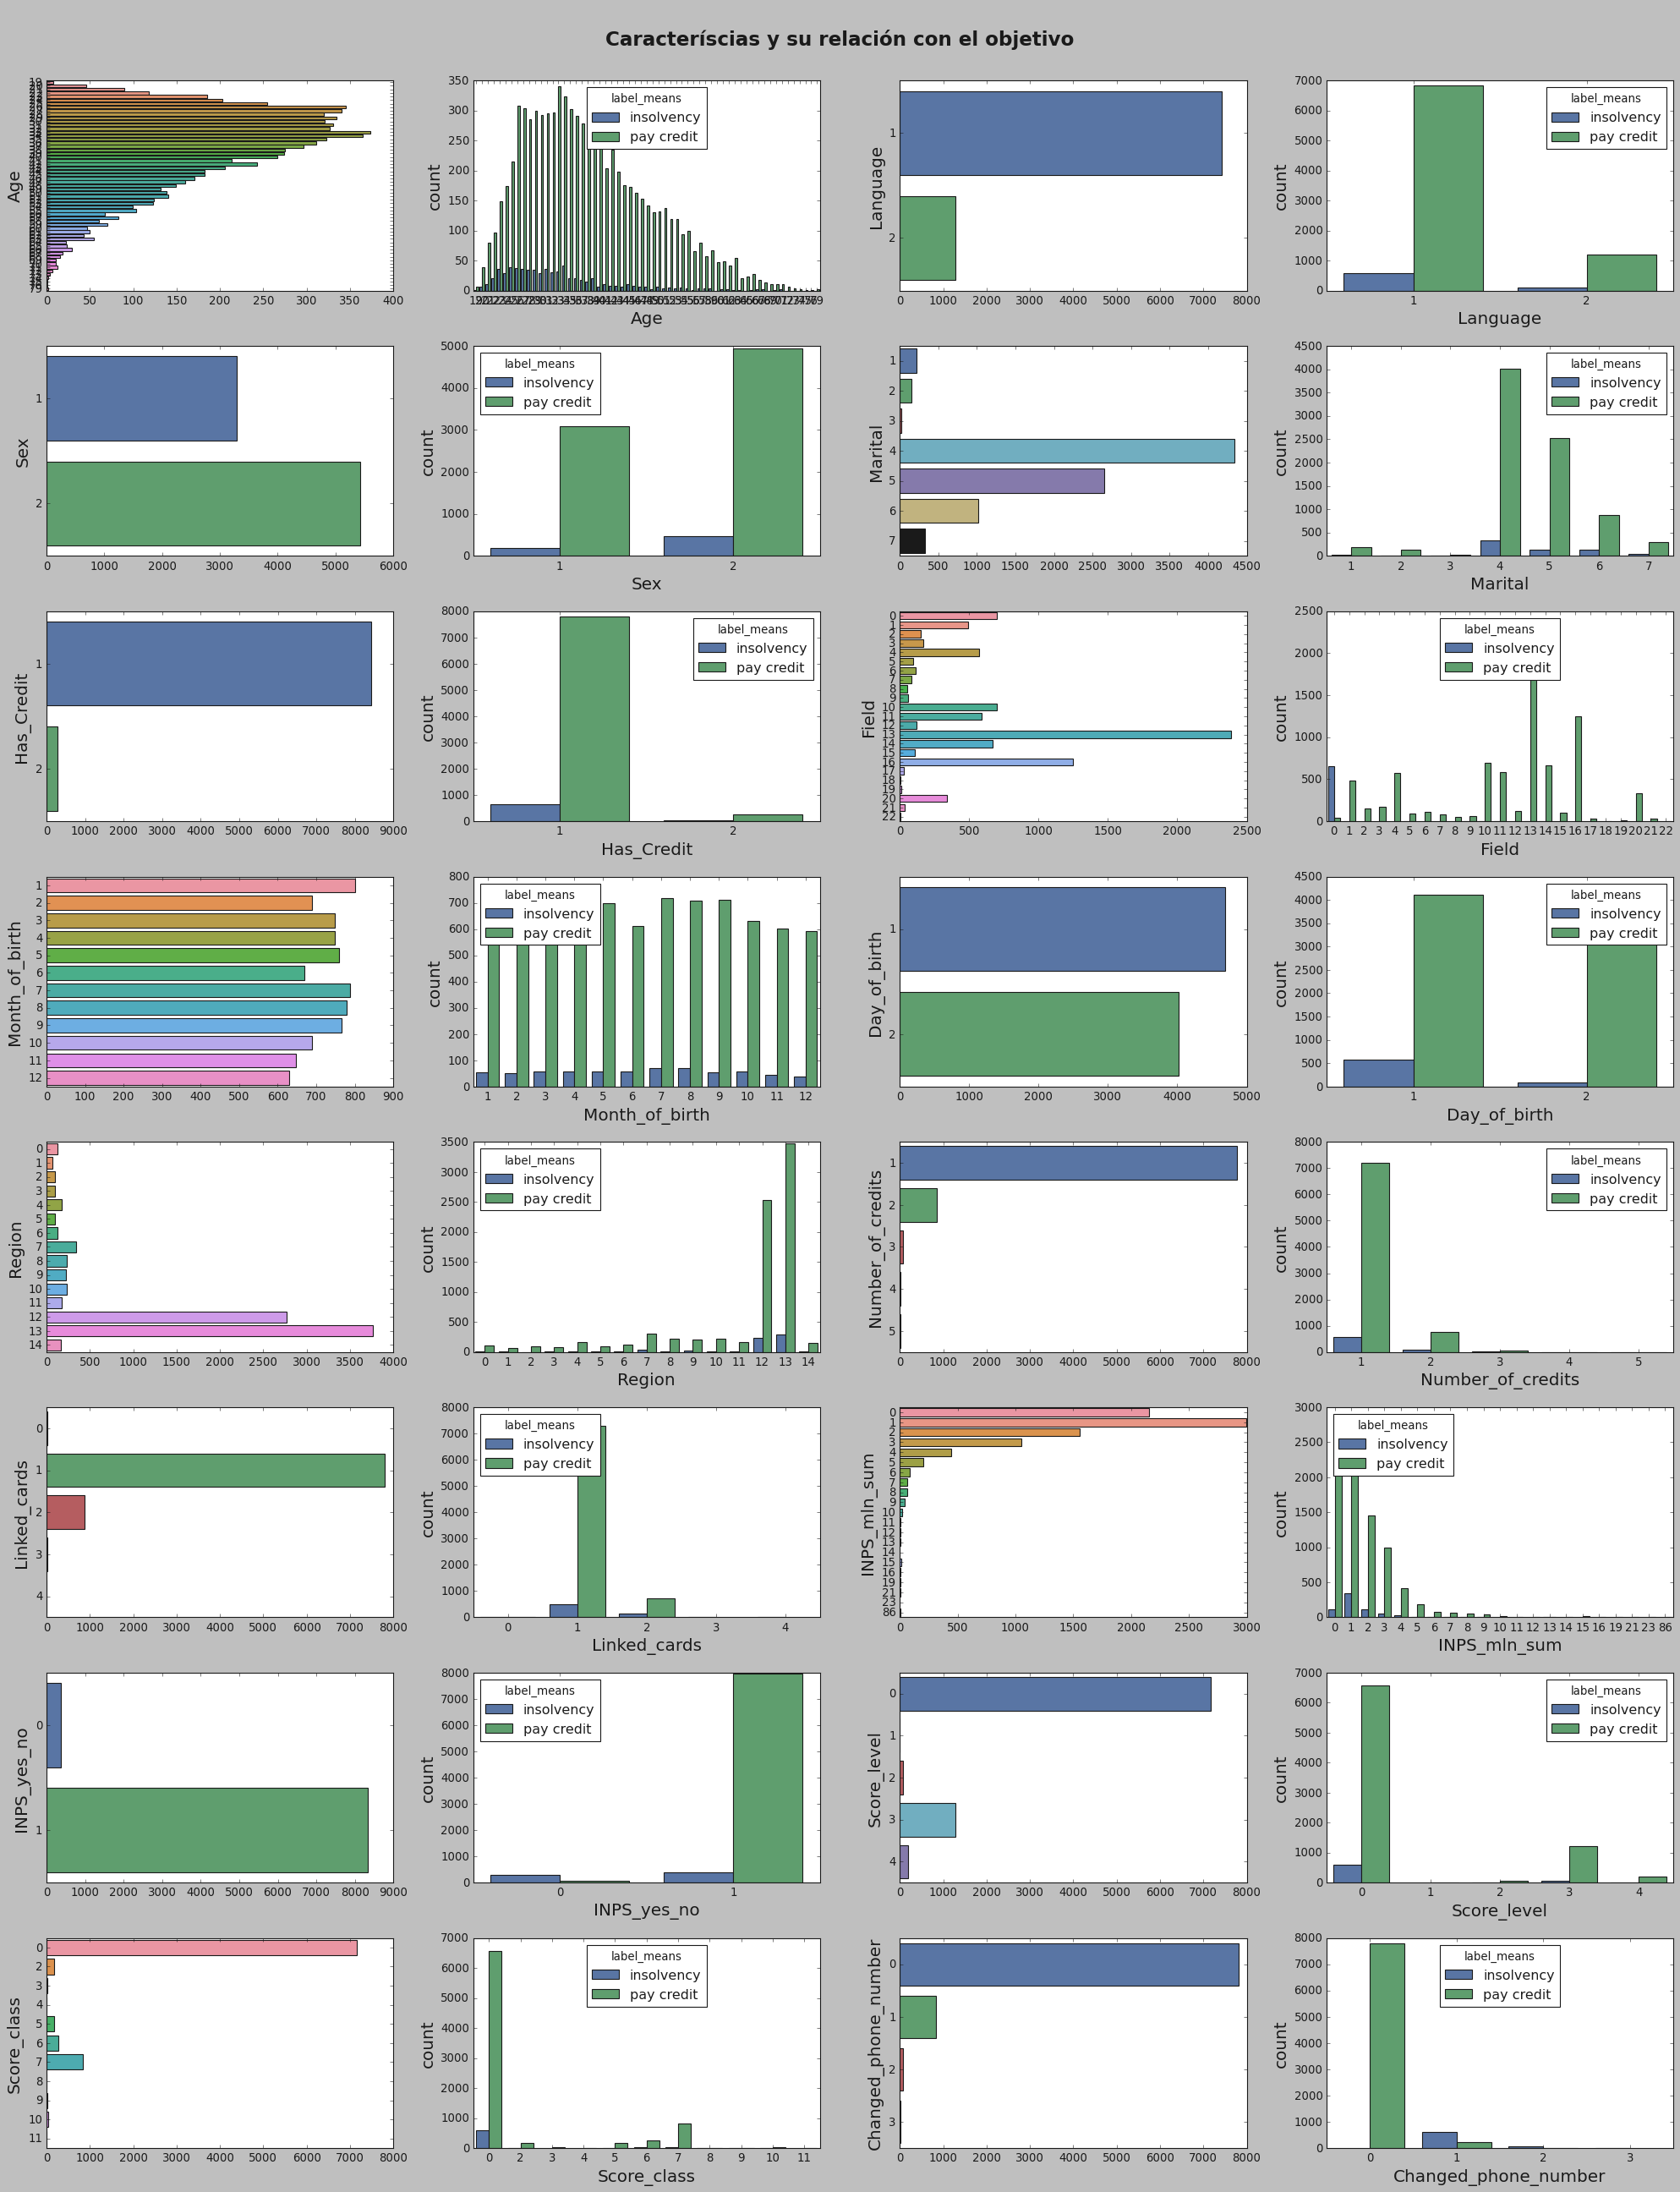

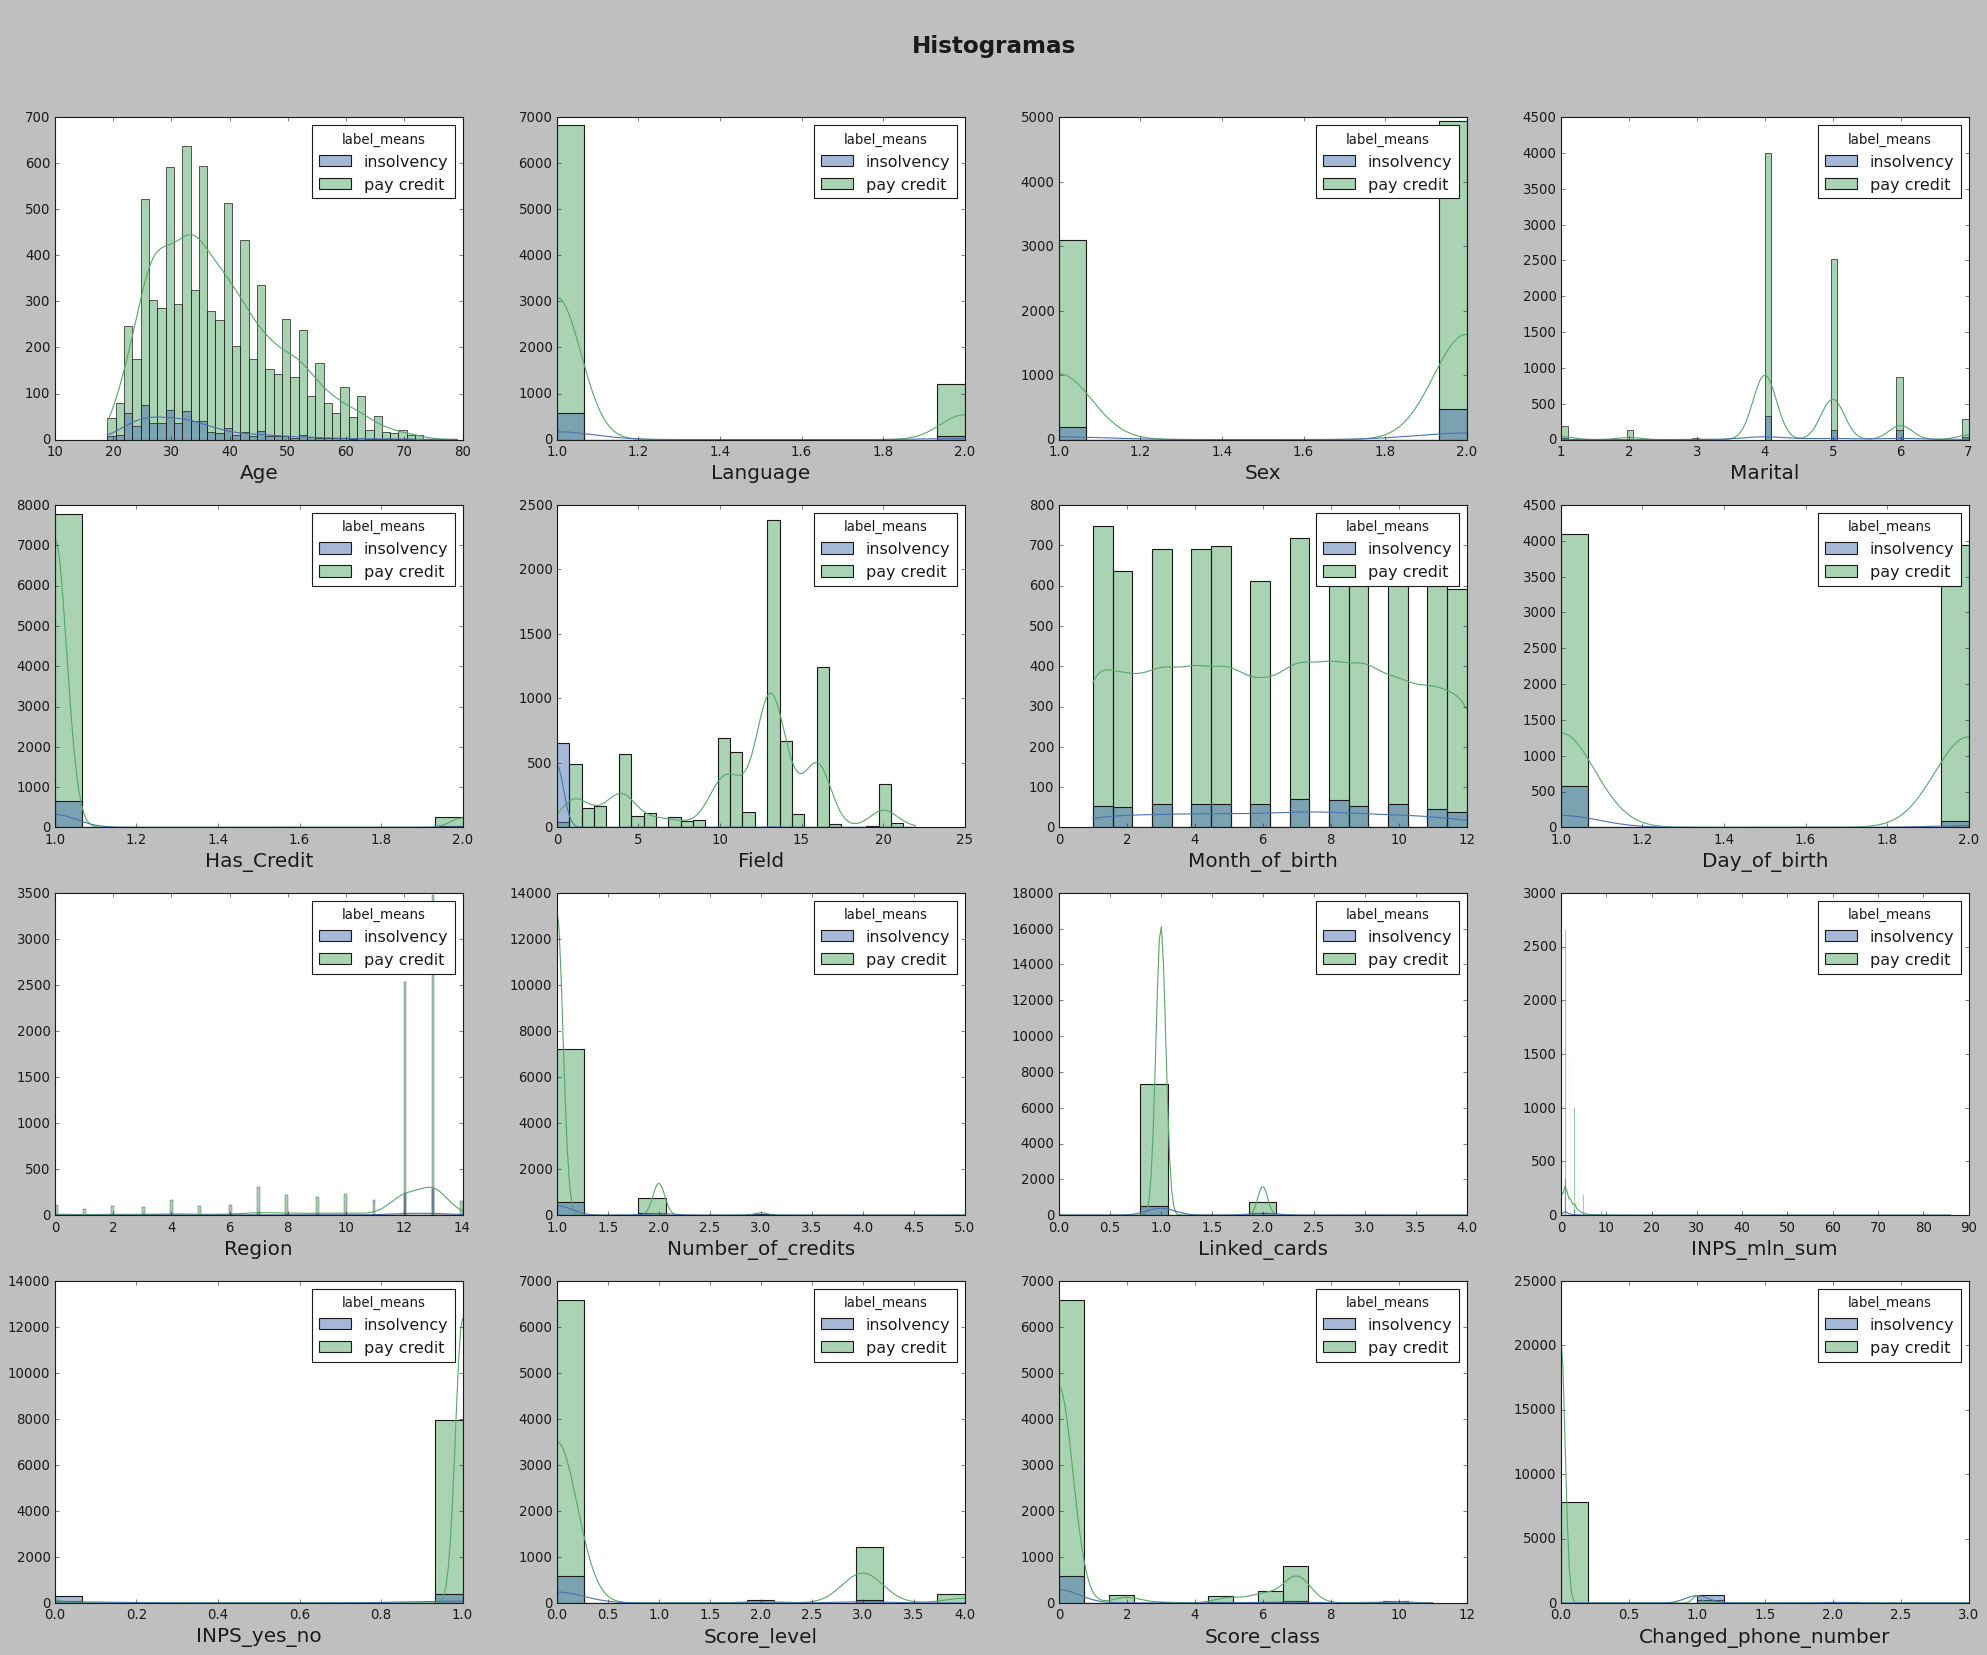

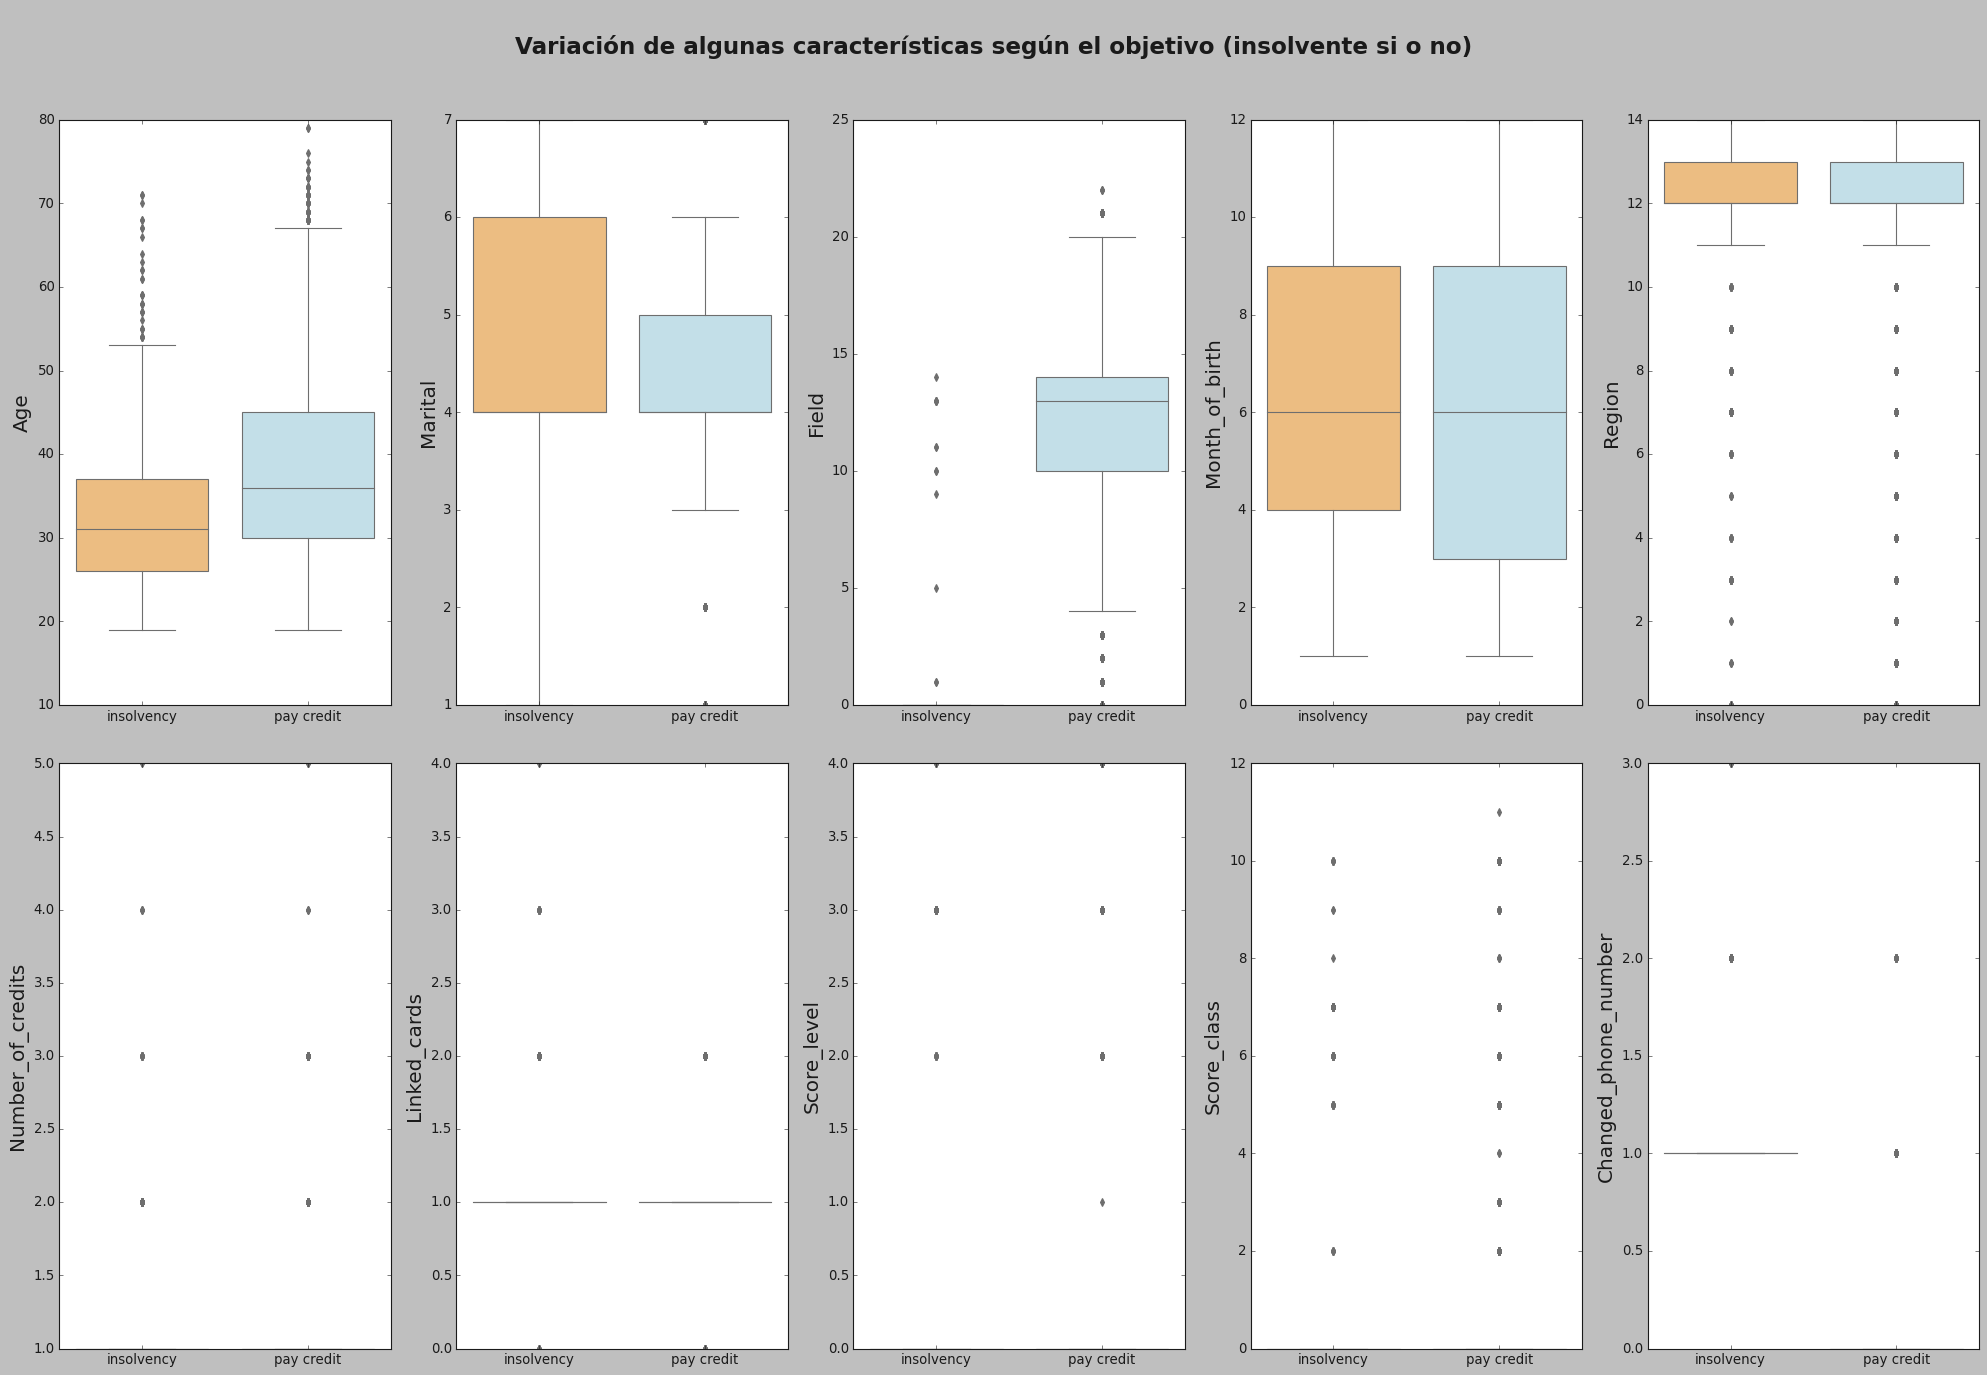

In [17]:
# comentar para saltarse los gráficos

basic_plots(data)
basic_hists(data)
basic_boxplots(data)


---
#### Models

In [18]:

X = data.drop(['label', 'label_means'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test :", y_test.shape)

X_train: (5833, 16)
y_train: (5833,)
X_test:  (2874, 16)
y_test : (2874,)


In [19]:
class Model() :
    u'''
    Practice plain object
    '''
    def __init__(self, name, model) :
        u'''
        Object intializacion 
        '''
    
        self.name = name
        self.model = model
        self.accuracy = 0
        self.auc_roc = 0
        self.confusion = None
        return
    
    def __str__(self) :
        u'''
        String representation
        '''
        return self.name + \
        'Accuracy: ' + str(self.accuracy) + \
        'AUC ROC : ' + str(self.auc_roc)
    
        

In [20]:
# definir los modelos a entrenar
models = []
models.append( Model('Regresión Logística', LogisticRegression() ) )
models.append( Model('k-vecinos más Cercanos', KNeighborsClassifier() ) )
models.append( Model('Naive Bayes Gaussiano', GaussianNB() ) )


In [21]:
# entrenar los modelos y capturar los resultados
for m in models :
    m.model.fit(X_train, y_train)
    y_pred = m.model.predict(X_test)
    m.accuracy = metrics.accuracy_score(y_test, y_pred)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    m.auc_roc = metrics.auc(fpr, tpr)
    m.confusion = confusion_matrix(y_test, y_pred)

---
#### Presentar los resultados

In [23]:
def show_metrics(models) :
    u'''
    
    '''
    df = pd.DataFrame()
    for m in models :
        '''
        df = df.append( pd.DataFrame(
            columns=['Modelo', 'Accuracy', 'AUC-ROC'], 
            data=[ m.name, m.accuracy, m.auc_roc ]) )
        '''
        df = pd.concat([df, pd.DataFrame(columns=[['Model', 'Accuracy', 'AUC-ROC']], data=[[ m.name, m.accuracy, m.auc_roc ]])], axis=0)
    display(df)
    return

show_metrics(models)

,Model,Accuracy,AUC-ROC
0,Regresión Logística,0.996868,0.991895
0,k-vecinos más Cercanos,0.973556,0.868144
0,Naive Bayes Gaussiano,0.988518,0.993795


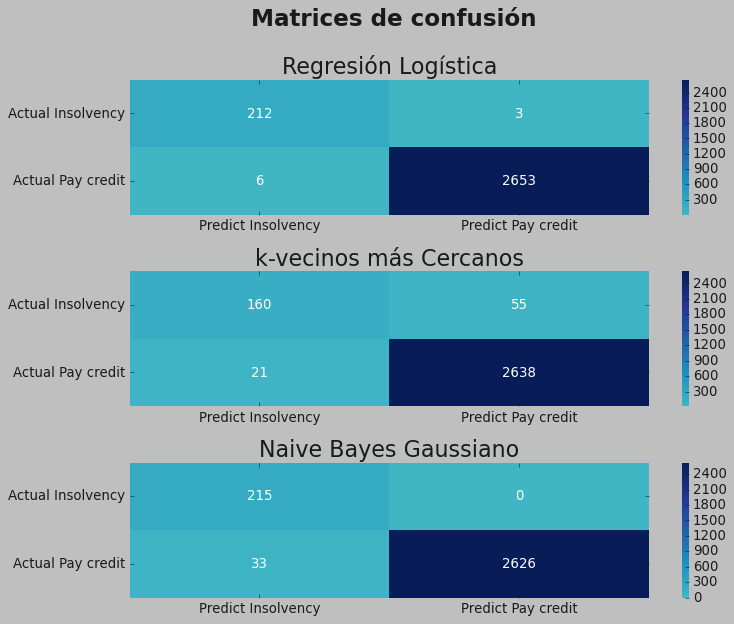

In [22]:
def show_confusion_matrix(models, cols=4) :
    u'''
    Display some confusion matrix graphs

    args
        models : list ob models objects
        cols : number of columns for the subplot; default is 4
    
    '''
    
    rows = (len(models) / cols) + 1
    
    for i, m in enumerate(models) :
        plt.subplot(rows, cols, i+1)
        sns.heatmap(pd.DataFrame(data=m.confusion, 
                                 index=['Actual Insolvency', 'Actual Pay credit'],
                                 columns=['Predict Insolvency', 'Predict Pay credit'] ), 
                    annot=True, center=0, fmt='d', cmap='YlGnBu')
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel(None)
        plt.xlabel(None)
        
    return

fig = plt.figure(figsize=(10,10));
fig.suptitle('Matrices de confusión', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_confusion_matrix(models, 1)



---
### Conclusiones

????